In [2]:
import pandas as pd


In [6]:
import pandas as pd

columns = ['g1_x', 'g1_y', 'g1_z', 'g2_x', 'g2_y', 'g2_z', 'class']

good = pd.read_csv("../data/goodPosture.txt", names=columns)
bad = pd.read_csv("../data/badPosture.txt", names=columns)

df = pd.concat([good, bad], axis=0, ignore_index=True)

print(df)


           g1_x       g1_y      g1_z        g2_x       g2_y        g2_z  class
0     11.574894 -76.283462 -9.243393    0.000000   0.000000    0.000000   good
1     11.375299 -76.146537 -9.108152 -174.153515 -80.120379  173.041179   good
2     11.299645 -76.100832 -9.077328 -174.222900 -80.145151  173.056784   good
3     11.341434 -76.174561 -9.139042 -174.330933 -80.058043  173.089882   good
4     11.333670 -76.192645 -9.157010 -174.451337 -79.961864  173.135536   good
..          ...        ...       ...         ...        ...         ...    ...
901 -162.677458 -33.285396 -5.398960 -133.891124 -19.077627   -8.027567    bad
902 -165.871117 -33.835551 -1.976419 -136.857300 -20.522495   -4.367570    bad
903 -168.793899 -34.110361  0.329602 -141.048404 -21.763483   -0.983535    bad
904 -171.509685 -33.506005  1.138439 -146.898033 -22.595478    0.964737    bad
905 -176.266152 -32.777071 -0.150250 -154.190122 -22.762445    0.936438    bad

[906 rows x 7 columns]


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

In [15]:
X = df[['g1_x', 'g1_y', 'g1_z', 'g2_x', 'g2_y', 'g2_z']]

y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(724, 182, 724, 182)

In [16]:
X_train[:5], y_train[:5]

(           g1_x       g1_y        g1_z        g2_x       g2_y        g2_z
 84    -4.650601 -81.973547 -128.045247 -171.776457 -76.194576   33.432185
 10    11.112542 -76.533275   -9.419471 -174.967414 -79.419032  173.536994
 616 -172.142419 -69.824143 -151.731702 -169.503318 -22.639075   13.091739
 250 -166.029271 -47.740517  124.459764 -171.667958 -31.939005  115.428783
 478 -179.407688 -81.901960  153.271466 -168.768883 -42.129270  149.730867,
 84     1
 10     1
 616    0
 250    1
 478    0
 Name: class, dtype: int64)

In [17]:
from sklearn.linear_model import LogisticRegression

LogR = LogisticRegression()

model_LogR = LogR.fit(X_train, y_train)

predictions = LogR.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy}")


Accuracy: 0.9285714285714286


In [19]:
for i in range(len(predictions)):
    print(f"Predicted: {label_encoder.inverse_transform([predictions[i]])[0]}, Actual: {label_encoder.inverse_transform([y_test.iloc[i]])[0]}")

Predicted:  good, Actual:  bad
Predicted:  good, Actual:  good
Predicted:  good, Actual:  good
Predicted:  bad, Actual:  bad
Predicted:  bad, Actual:  bad
Predicted:  bad, Actual:  bad
Predicted:  bad, Actual:  bad
Predicted:  good, Actual:  good
Predicted:  good, Actual:  bad
Predicted:  bad, Actual:  bad
Predicted:  bad, Actual:  bad
Predicted:  good, Actual:  bad
Predicted:  good, Actual:  good
Predicted:  good, Actual:  good
Predicted:  good, Actual:  good
Predicted:  bad, Actual:  bad
Predicted:  good, Actual:  good
Predicted:  good, Actual:  good
Predicted:  bad, Actual:  bad
Predicted:  bad, Actual:  bad
Predicted:  good, Actual:  good
Predicted:  good, Actual:  good
Predicted:  good, Actual:  good
Predicted:  good, Actual:  good
Predicted:  bad, Actual:  bad
Predicted:  bad, Actual:  bad
Predicted:  good, Actual:  good
Predicted:  bad, Actual:  bad
Predicted:  bad, Actual:  bad
Predicted:  good, Actual:  good
Predicted:  good, Actual:  good
Predicted:  bad, Actual:  bad
Predict

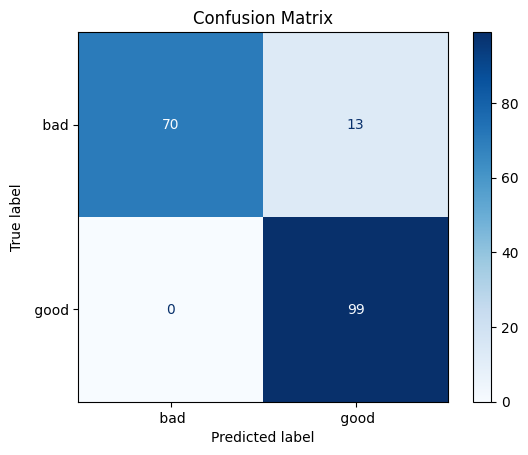

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [22]:
import joblib

joblib.dump(model_LogR, 'model.pkl')

['model.pkl']